In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl (8.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.8.0 which is incompatible.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.8.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")

# Data Loading 

[Ref] https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
_data = load_iris()
_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data = _data.data
feature_names = _data.feature_names

df = pd.DataFrame(data, columns=feature_names)
df["target"] = _data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preprocessing

In [5]:
df.shape

(150, 5)

In [ ]:
# df.isnull()
df.isnull().sum()  # 개수 베이스

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


target std가 mean에 붙어있음->continuous value가 아님

In [8]:
# Re-define target names
target_mapping = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
df["target"] = df["target"].map(target_mapping)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df["target"].value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df.describe()  # continuous features only

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA 
## Descriptive Statistics
분석 단위: 꽃의 종류

In [ ]:
df.groupby("target").describe().T  # .T to transpose

target                   Iris-setosa  Iris-versicolor  Iris-virginica
sepal length (cm) count    50.000000        50.000000       50.000000
                  mean      5.006000         5.936000        6.588000
                  std       0.352490         0.516171        0.635880
                  min       4.300000         4.900000        4.900000
                  25%       4.800000         5.600000        6.225000
                  50%       5.000000         5.900000        6.500000
                  75%       5.200000         6.300000        6.900000
                  max       5.800000         7.000000        7.900000
sepal width (cm)  count    50.000000        50.000000       50.000000
                  mean      3.428000         2.770000        2.974000
                  std       0.379064         0.313798        0.322497
                  min       2.300000         2.000000        2.200000
                  25%       3.200000         2.525000        2.800000
                  50%       3.400000         2.800000        3.000000
                  75%       3.675000         3.000000        3.175000
                  max       4.400000         3.400000        3.800000
petal length (cm) count    50.000000        50.000000       50.000000
                  mean      1.462000         4.260000        5.552000
                  std       0.173664         0.469911        0.551895
                  min       1.000000         3.000000        4.500000
                  25%       1.400000         4.000000        5.100000
                  50%       1.500000         4.350000        5.550000
                  75%       1.575000         4.600000        5.875000
                  max       1.900000         5.100000        6.900000
petal width (cm)  count    50.000000        50.000000       50.000000
                  mean      0.246000         1.326000        2.026000
                  std       0.105386         0.197753        0.274650
                  min       0.100000         1.000000        1.400000
                  25%       0.200000         1.200000        1.800000
                  50%       0.200000         1.300000        2.000000
                  75%       0.300000         1.500000        2.300000
                  max       0.600000         1.800000        2.500000

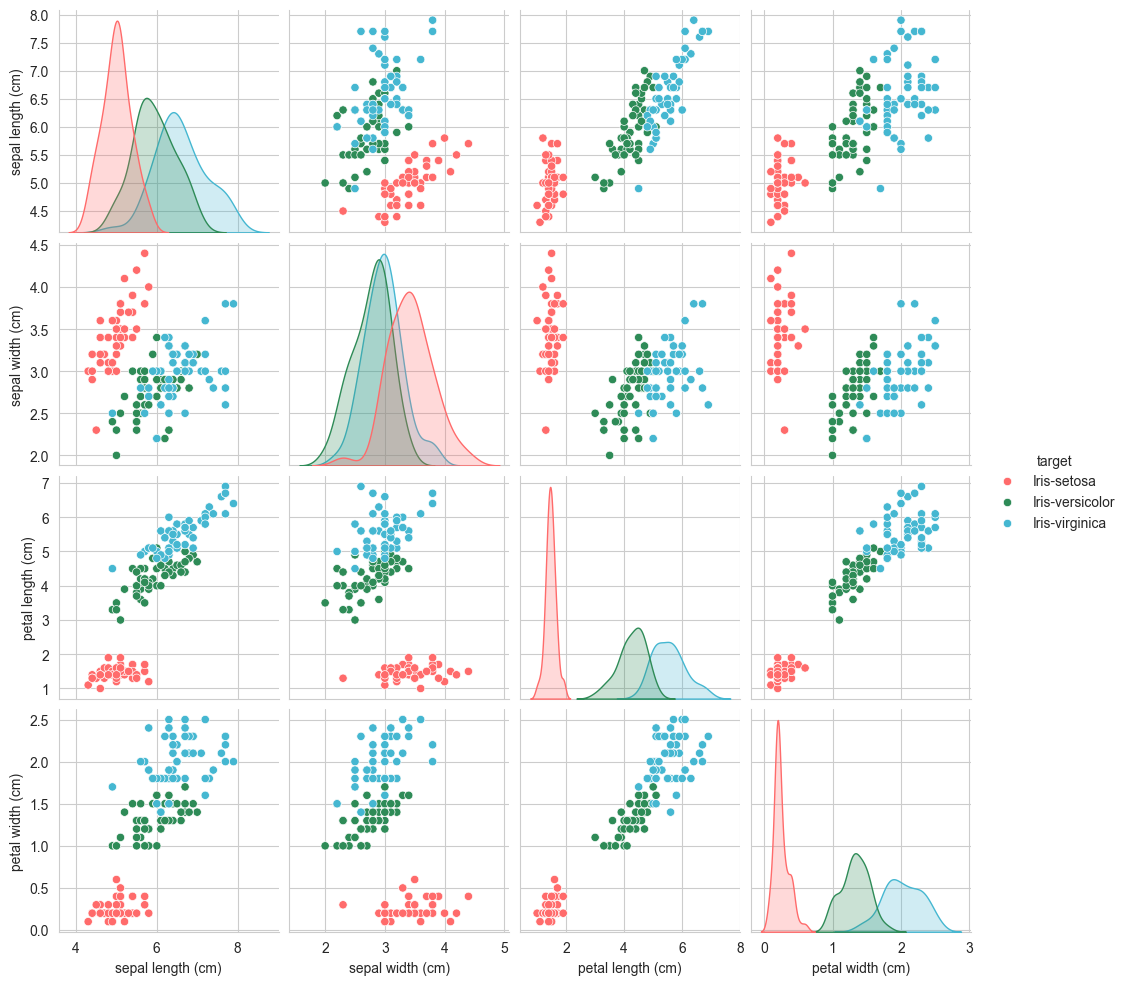

In [12]:
custom_palette = ["#FF6B6B", "#2E8B57", "#45B7D1"]
sns.pairplot(df, hue="target", palette=custom_palette)

## skewness

In [13]:
df.groupby("target").skew()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
Iris-setosa,0.120087,0.041167,0.106394,1.253861
Iris-versicolor,0.105378,-0.362845,-0.606508,-0.031180
Iris-virginica,0.118015,0.365949,0.549445,-0.129477


<Axes: xlabel='target'>

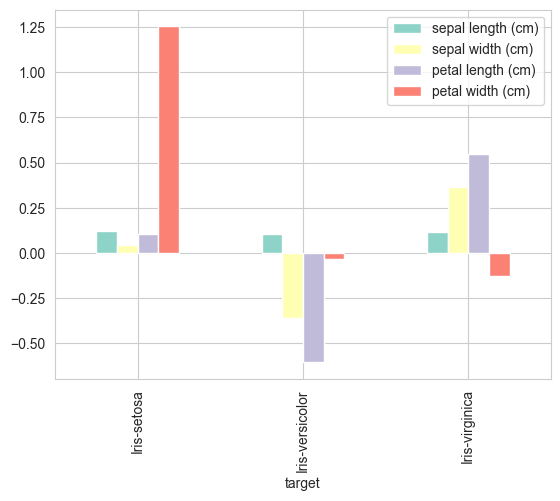

In [14]:
df_skew = df.groupby("target").skew()
df_skew.plot(kind="bar", grid=True)

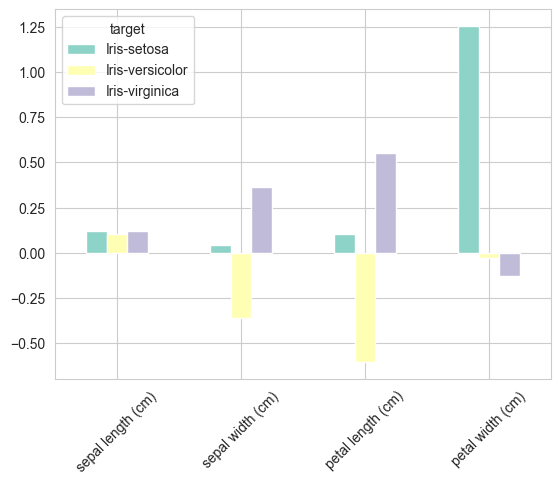

In [15]:
df_skew.T.plot(kind="bar", grid=True)
plt.xticks(rotation=45)
plt.show()

## kurtosis

In [16]:
df.groupby("target").kurtosis()

AttributeError: 'DataFrameGroupBy' object has no attribute 'kurtosis'

In [ ]:
df.groupby("target").apply(lambda group: group.iloc[:, :-1].kurtosis())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
Iris-setosa,-0.252689,0.954703,1.021576,1.719130
Iris-versicolor,-0.533010,-0.366237,0.047903,-0.410059
Iris-virginica,0.032904,0.706071,-0.153779,-0.602264


<Axes: xlabel='target'>

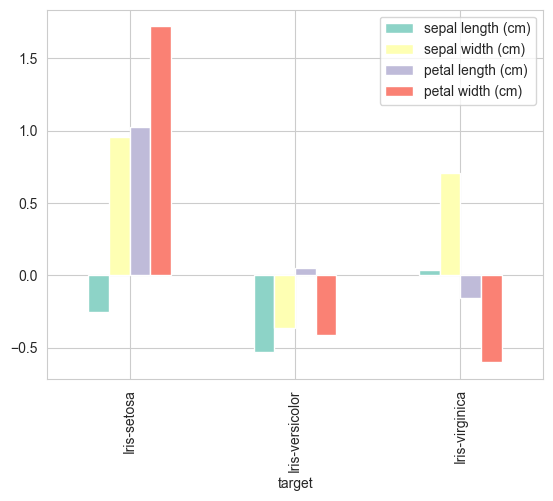

In [18]:
df_kurt = df.groupby("target").apply(lambda group: group.iloc[:, :-1].kurtosis())
df_kurt.plot(kind="bar", grid=True)

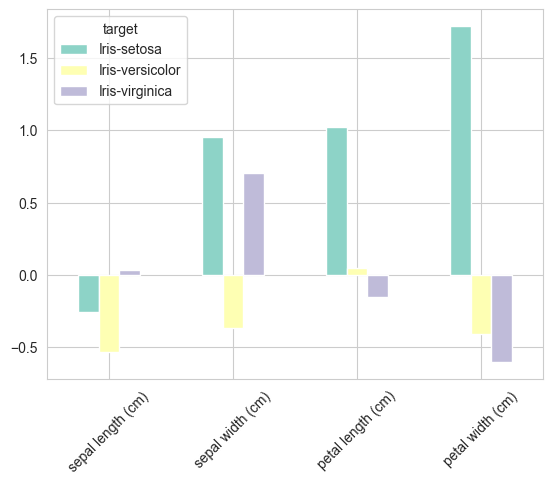

In [19]:
df_kurt.T.plot(kind="bar", grid=True)
plt.xticks(rotation=45)
plt.show()

----
End of Documents